<a href="https://colab.research.google.com/github/sahoomrutyunjaya12345/TopicModellingonNewsArticle/blob/main/TopicModellingOnNewsArticle_CapstoneProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Extraction/identification of major topics & themes discussed in news articles. 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -**   Mrutyunjaya Sahoo


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In this project our task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.**

###**Data Description**

**The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.**

In [2]:

!pip install contractions
!pip install pyLDAvis 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 12.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 80.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are 

In [4]:
import pandas as pd                                                              ## To frame the data
import os                                                                        ## For listing files in given directory
import matplotlib.pyplot as plt                                                  ## For visualization
import seaborn as sns                                                            ## For visualization

from bs4 import BeautifulSoup                                                    ## Python library used to scrape data from webpages
import re                                                                        ## Module which provides regular expression matching operations
import string                                                                    ## For string manipulation
import nltk                                                                      ## Popular library to pre-process the text in NLP
nltk.download('wordnet')                                                        ## Downloading stopwords
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.stem import WordNetLemmatizer                                          ## A Lemmatizer  
from nltk.corpus import stopwords                                                ## Stopwords package from nltk
from wordcloud import WordCloud                                                  ## Create interactive wordclouds

from sklearn.decomposition import TruncatedSVD                                   ## For LSA/LSI
from sklearn.decomposition import NMF                                            ## Non-matrix factorization algorithm
from sklearn.decomposition import LatentDirichletAllocation as LDA               ## Latent Dirichlet Allocation algorithm

import pyLDAvis                                                                  ## To visualize LDA topic modelling
pyLDAvis.enable_notebook()                                                       ## Enabing notebook for pyLDAvis visualizations

from sklearn.feature_extraction.text import CountVectorizer                      ## count-vectorizer to convert text data into vector form

import warnings                                                                  ## Ignore warnings
warnings. simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Mounting thr drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
path = '/content/drive/MyDrive/AlmaBetter/NEWS POPULARITY PREDICTION CAPSTONE/bbc/'

In [11]:
news = []                                                                        ## Empty list for storing actual news in text       
topics = []                                                                      ## Empty list for new theme

In [12]:
Themes = ['business','entertainment','politics','sport','tech']  ## News themes 

In [13]:
for x in Themes:                                                                 ## For every item in Themes
    all_txt_files=sorted(os.listdir(path+x))                                     ## List all files present in given directory in sorted order
    for files in all_txt_files:                                                  ## For every item in txt_files
        txt_path=path + x + '/' + files                                          ## specifying exact path of every text news file
        with open(txt_path,'rb') as f:                                           ## open a text file
            text=f.read()                                                        ## read text file
        news.append(text)                                                        ## append text file which is our news, to empty news list
        topics.append(x)                                                         ## append the topic of news file to empty topics list

In [14]:
# Creating an empty dataframe
news_data = pd.DataFrame()  

In [15]:
# Adding both new column
news_data['News_text'] = news                                                    
news_data['News_Theme'] = topics  

news_data.head()
     

,News_text,News_Theme
0,b'Ad sales boost Time Warner profit\n\nQuarter...,business
1,b'Dollar gains on Greenspan speech\n\nThe doll...,business
2,b'Yukos unit buyer faces loan claim\n\nThe own...,business
3,b'High fuel prices hit BA\'s profits\n\nBritis...,business
4,"b""Pernod takeover talk lifts Domecq\n\nShares ...",business


In [16]:
# checking the last 5 dataset
news_data.tail()

,News_text,News_Theme
2220,b'BT program to beat dialler scams\n\nBT is in...,tech
2221,b'Spam e-mails tempt net shoppers\n\nComputer ...,tech
2222,b'Be careful how you code\n\nA new European di...,tech
2223,b'US cyber security chief resigns\n\nThe man m...,tech
2224,b'Losing yourself in online gaming\n\nOnline r...,tech


In [17]:
# Checking the dataset rows and colimns
news_data.shape

(2225, 2)

In [18]:
# Checking the columns of the dataset
news_data.columns

Index(['News_text', 'News_Theme'], dtype='object')

In [19]:
# Creating a copy of it
data_df = news_data.copy()

In [20]:
# Checking the info about dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News_text   2225 non-null   object
 1   News_Theme  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [23]:
# checking the no. of duplicates in the dataset
data_df.duplicated().sum()

98

In [26]:
# dropping the duplicates
data_df.drop_duplicates(keep = 'first',inplace=True)
data_df.shape

(2127, 2)

In [25]:
# Checking the info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   News_text   2127 non-null   object
 1   News_Theme  2127 non-null   object
dtypes: object(2)
memory usage: 49.9+ KB


In [27]:
# Checking for missing/Null values
data_df.isnull().sum()

News_text     0
News_Theme    0
dtype: int64

In [28]:
# Checking the count,std,etc on variables
data_df.describe()

,News_text,News_Theme
count,2127,2127
unique,2127,5
top,b'Ad sales boost Time Warner profit\n\nQuarter...,sport
freq,1,505


In [35]:
# Checking the valuecounts of dataset
data= data_df['News_Theme'].value_counts()
data

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: News_Theme, dtype: int64

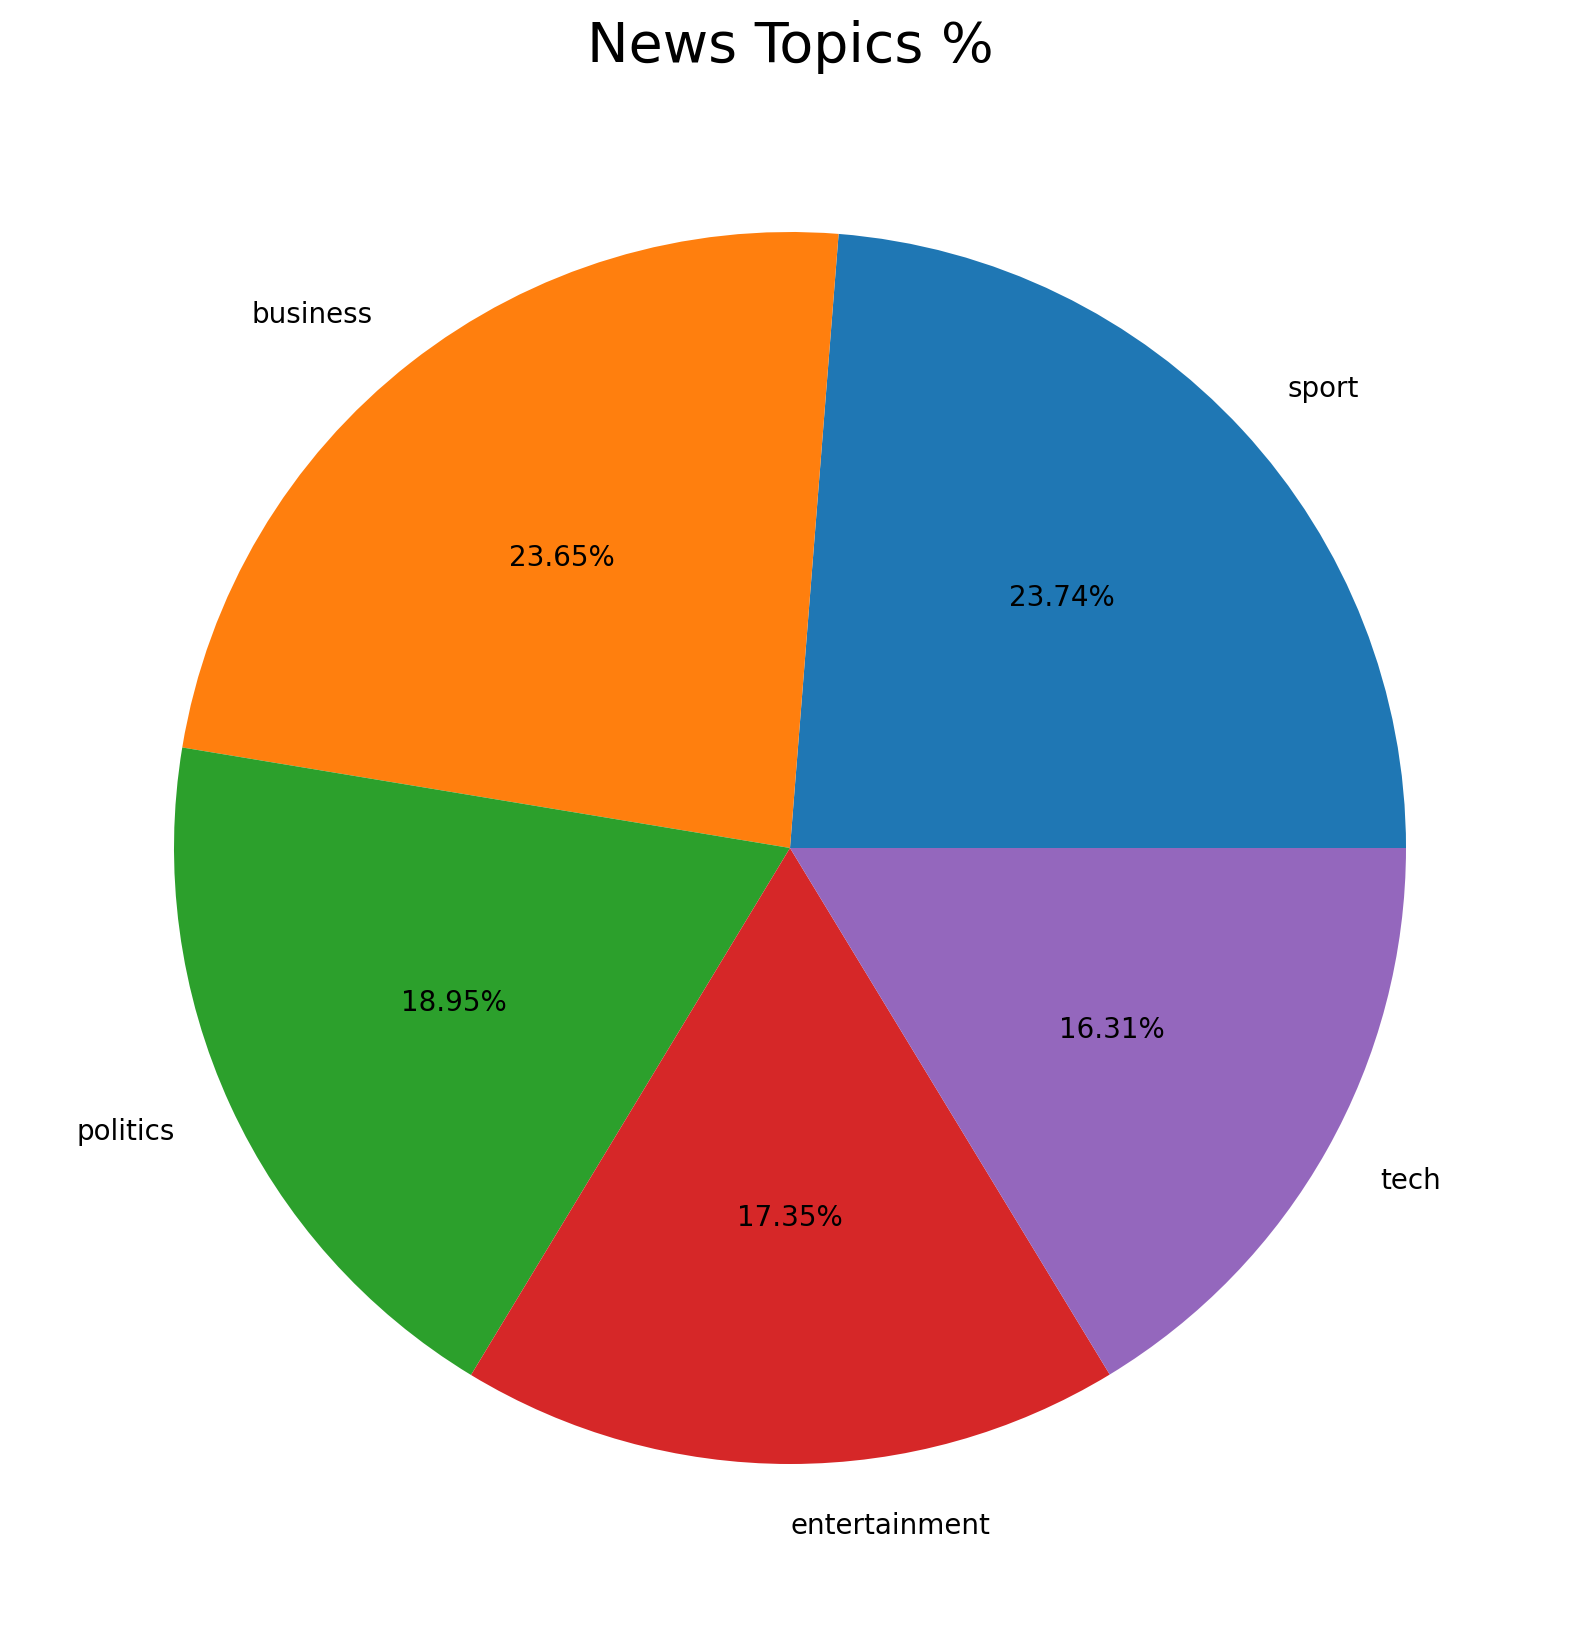

In [37]:
plt.figure(figsize = (10,10))
plt.pie(data, autopct = '%0.2f%%' , labels = data.index)
plt.title('News Topics %', size = 20)
plt.show()

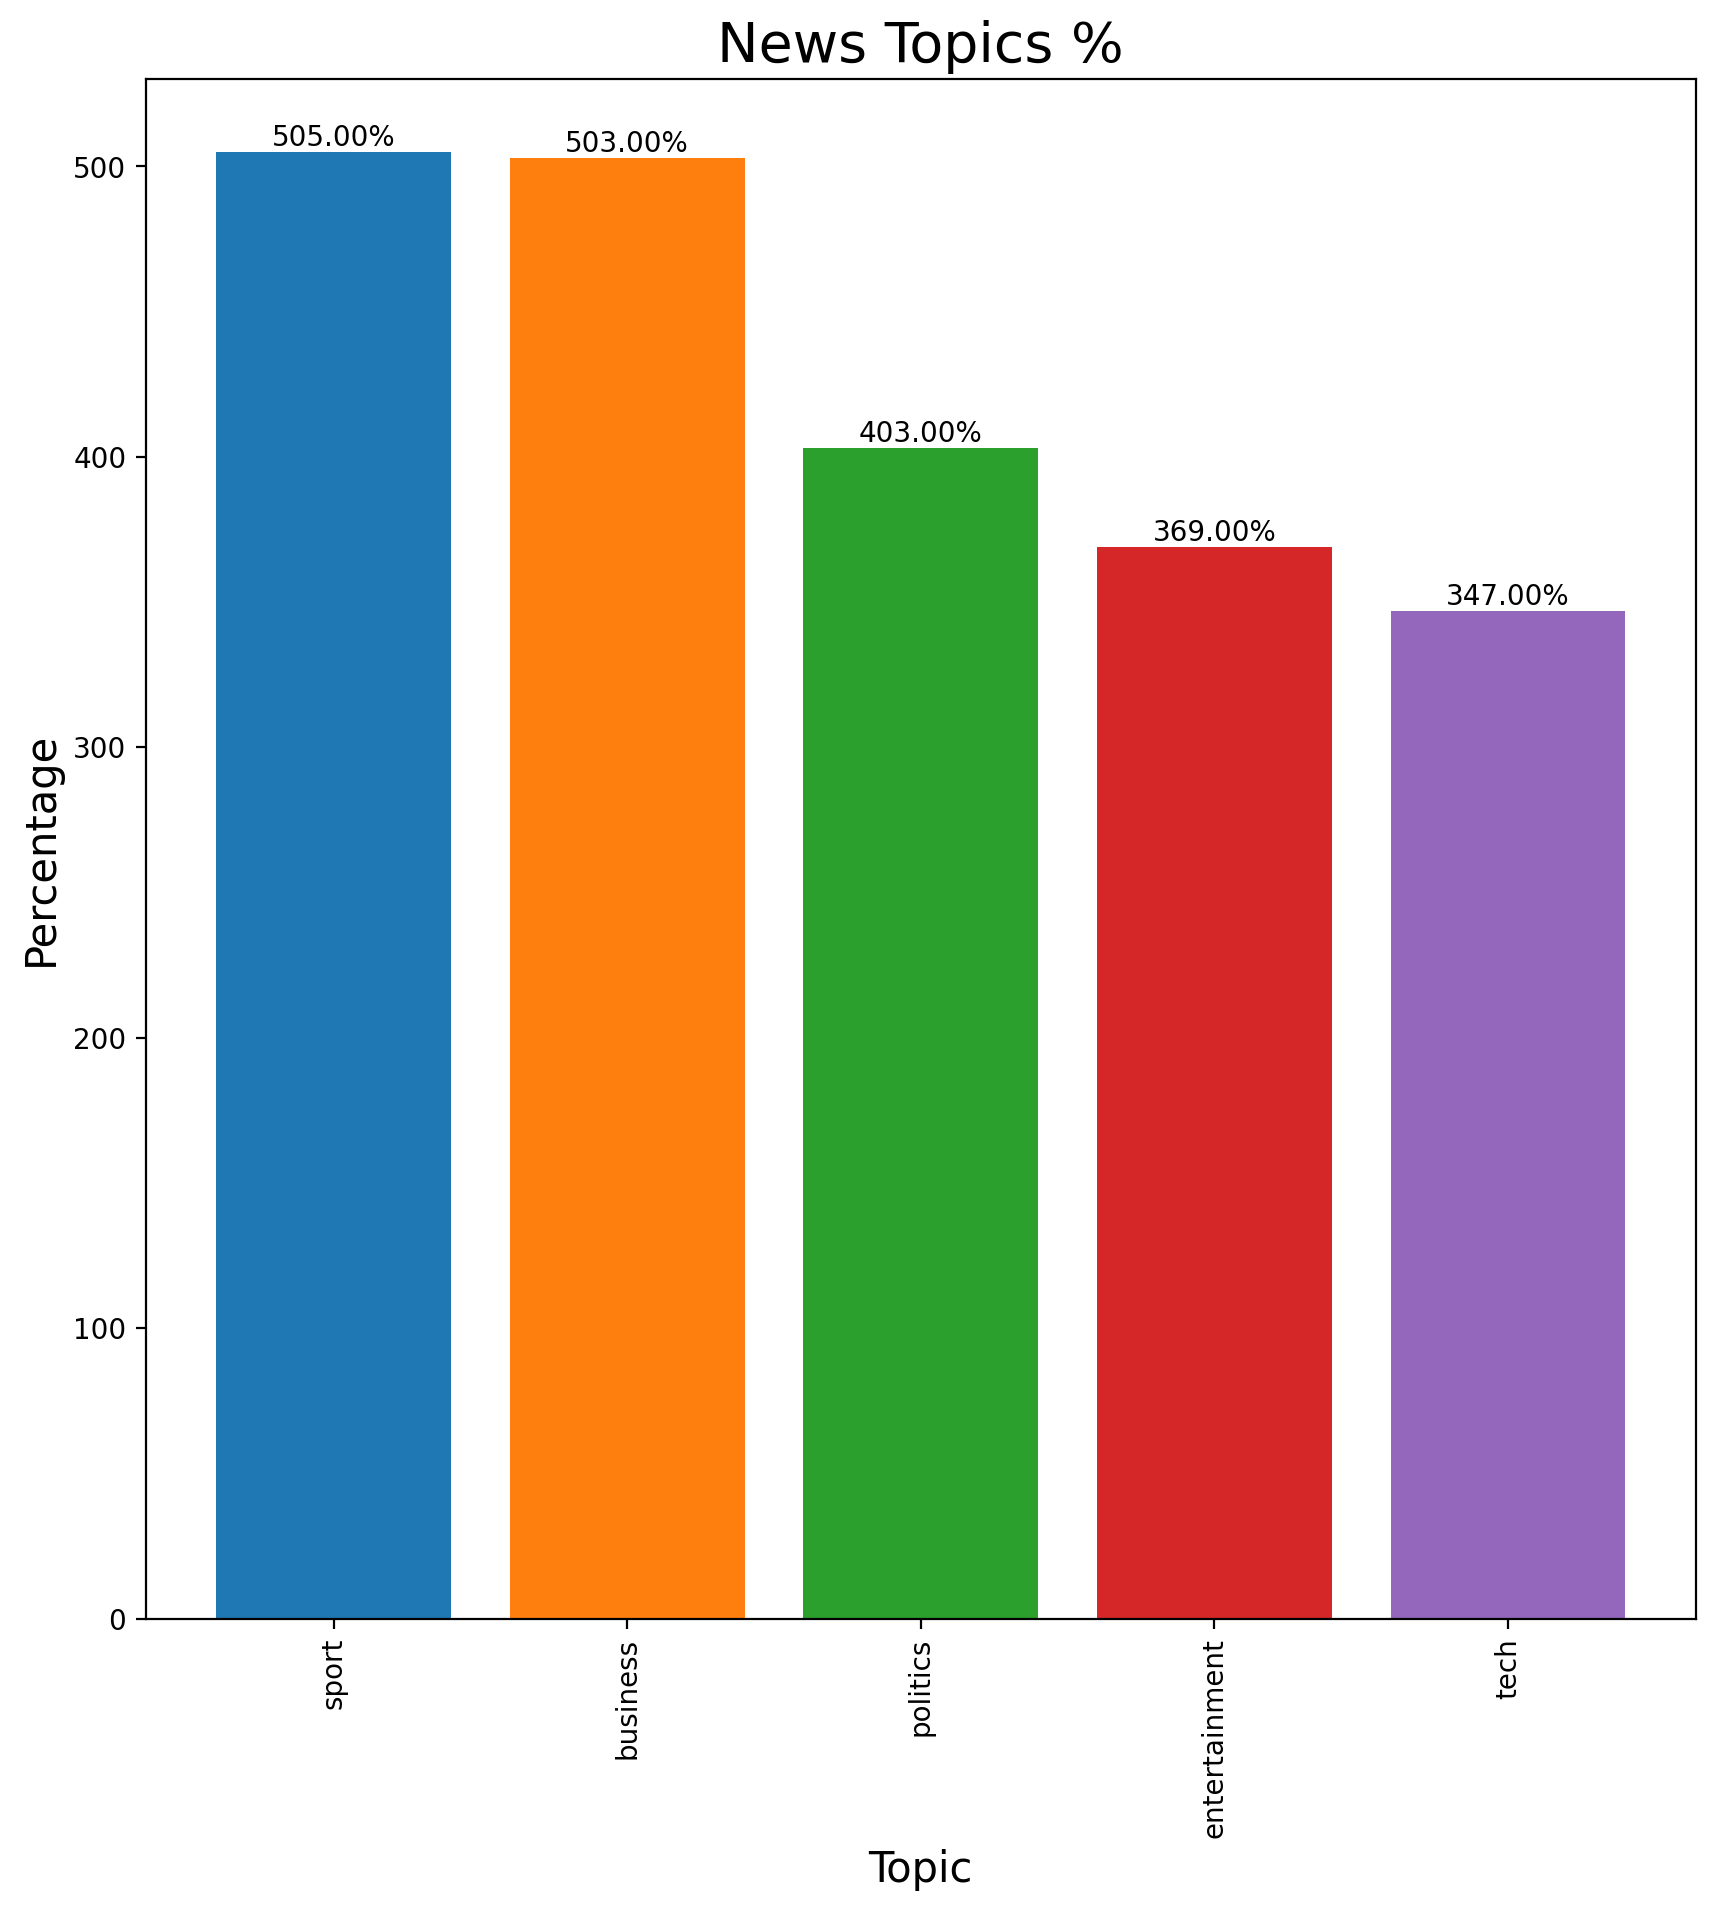

In [40]:
# define a list of colors for each topic
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

plt.figure(figsize=(10, 10))
plt.bar(data.index, data.values, color=colors)
plt.title('News Topics %', size=20)
plt.xlabel('Topic', size=15)
plt.ylabel('Percentage', size=15)

# add value labels to the bars
for i, value in enumerate(data.values):
  plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.xticks(rotation=90)
plt.show()


## **NLP Text Processing**

In [42]:
# viewing the data in news_text column
data_df['News_text'][0]

b'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (\xc2\xa3600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will tr